## Libreria y conexión con ETABS

In [21]:
import pandas as pd
import numpy as np
import comtypes.client
import sys
import matplotlib.pyplot as plt
import os
import math
import openpyxl

def connect_to_existing_etabs():
    
        helper = comtypes.client.CreateObject('ETABSv1.Helper');
        helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper);

        try:
            myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject");
            print("Conectado exitosamente")
        except (OSError,comtypes.COMError):
            print("Ha fallado.")
            sys.exit(-1);

        SapModel = myETABSObject.SapModel
        return SapModel,myETABSObject,helper;

SapModel, myETABSObject, helper = connect_to_existing_etabs()

# Ton_m_C = 12
tonf_m_C = 12
ret = SapModel.SetPresentUnits(tonf_m_C)

Conectado exitosamente


### Agregar ESPECTRO

In [12]:
NumberTables=-1
TableKey=[]
TableName=[]
ImportType=[]
ReturnValue=-1

[NumberTables,Tablekey, Tablename, ImportType,ret]=SapModel.DatabaseTables.GetAvailableTables(NumberTables,TableKey,TableName,ImportType)
ret
#NumberTables
Tablename
#Tablekey
#ImportType

table_key='Functions - Response Spectrum - User Defined'

table_data=SapModel.DatabaseTables.GetTableForEditingArray(table_key,'')

table_data

[1,
 ('Name', 'Period', 'Value', 'DampRatio', 'GUID'),
 14,
 ('E030',
  '0',
  '1.18',
  '0.05',
  '5116a4ef-9a47-469c-8b72-46b4170ed4ee',
  'E030',
  '0.1',
  '1.18',
  '',
  '',
  'E030',
  '0.2',
  '1.18',
  '',
  '',
  'E030',
  '0.3',
  '1.18',
  '',
  '',
  'E030',
  '0.4',
  '1.18',
  '',
  '',
  'E030',
  '0.5',
  '1.18',
  '',
  '',
  'E030',
  '0.6',
  '1.18',
  '',
  '',
  'E030',
  '0.7',
  '1.01',
  '',
  '',
  'E030',
  '0.8',
  '0.89',
  '',
  '',
  'E030',
  '0.9',
  '0.7975',
  '',
  '',
  'E030',
  '1.5',
  '0.4725',
  '',
  '',
  'E030',
  '1.7',
  '0.4169',
  '',
  '',
  'E030',
  '2',
  '0.3544',
  '',
  '',
  'E030',
  '2.5',
  '0.2268',
  '',
  ''),
 0]

In [13]:
# Especifica la ruta de tu archivo Excel
ruta_excel = 'espectro.xlsx'

# Lee los datos desde el archivo Excel
datos = pd.read_excel(ruta_excel, sheet_name='Hoja1')

# Extrae la primera columna como una lista de strings y guárdala en "periodo"
periodo = datos.iloc[:, 0].astype(str).tolist()

# Extrae la segunda columna como una lista de strings y guárdala en "acc"
acc = datos.iloc[:, 1].astype(str).tolist()

# Ahora "periodo" y "acc" contienen las columnas del Excel como listas de strings
print("Periodo:", periodo)
print("Acc:", acc)

# Crear una lista para almacenar la secuencia
secuencia = []

# Iterar a través de las listas "periodo" y "acc" para construir la secuencia
for periodo_valor, acc_valor in zip(periodo, acc):
    secuencia.extend(['E030', periodo_valor, acc_valor, '0.05', ''])

# La lista "secuencia" ahora contiene la secuencia deseada
print(secuencia)

Periodo: ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.5', '1.7', '2.0', '2.5']
Acc: ['1.18', '1.18', '1.18', '1.18', '1.18', '1.18', '1.18', '1.01', '0.89', '0.7975', '0.4725', '0.4169', '0.3544', '0.2268']
['E030', '0.0', '1.18', '0.05', '', 'E030', '0.1', '1.18', '0.05', '', 'E030', '0.2', '1.18', '0.05', '', 'E030', '0.3', '1.18', '0.05', '', 'E030', '0.4', '1.18', '0.05', '', 'E030', '0.5', '1.18', '0.05', '', 'E030', '0.6', '1.18', '0.05', '', 'E030', '0.7', '1.01', '0.05', '', 'E030', '0.8', '0.89', '0.05', '', 'E030', '0.9', '0.7975', '0.05', '', 'E030', '1.5', '0.4725', '0.05', '', 'E030', '1.7', '0.4169', '0.05', '', 'E030', '2.0', '0.3544', '0.05', '', 'E030', '2.5', '0.2268', '0.05', '']


In [14]:
TableVersion = 1
NumberRecords = 1
tTableKey = 'Functions - Response Spectrum - User Defined'
fieldKeysIncluded = ['Name', 'Period', 'Value', 'DampRatio', 'GUID']

TableData = secuencia

ret = SapModel.DatabaseTables.SetTableForEditingArray(tTableKey, TableVersion,
fieldKeysIncluded, NumberRecords, TableData)
ret=SapModel.DatabaseTables.ApplyEditedTables(True)

ret

[0, 0, 0, 0, '', 0]

### Crear caso de carga Modal Espectral

In [15]:
MyLoadName = ['U1']  # Lista de nombres de carga
MyFunc = ['E030']  # Lista de nombres de funciones de espectro de respuesta
MySF = [9.81]  # Lista de factores de escala
MyCSys = ['Global']  # Lista de sistemas de coordenadas
MyAng = [0]  # Lista de ángulos de rotación

ret = SapModel.LoadCases.ResponseSpectrum.SetCase('SX')
ret = SapModel.LoadCases.ResponseSpectrum.SetLoads('SX',1, MyLoadName,MyFunc, MySF, MyCSys, MyAng)
ret = SapModel.LoadCases.ResponseSpectrum.SetEccentricity('SX',0.05)

In [16]:
MyLoadName = ['U2']  # Lista de nombres de carga
MyFunc = ['E030']  # Lista de nombres de funciones de espectro de respuesta
MySF = [9.81]  # Lista de factores de escala
MyCSys = ['Global']  # Lista de sistemas de coordenadas
MyAng = [0]  # Lista de ángulos de rotación

ret = SapModel.LoadCases.ResponseSpectrum.SetCase('SY')
ret = SapModel.LoadCases.ResponseSpectrum.SetLoads('SY',1, MyLoadName,MyFunc, MySF, MyCSys, MyAng)
ret = SapModel.LoadCases.ResponseSpectrum.SetEccentricity('SY',0.05)

### Resultados de Desplazamiento por nivel

In [27]:
name_table="Story Max Over Avg Displacements"
table = SapModel.DatabaseTables.GetTableForDisplayArray(name_table ,GroupName="")    
cols=table[2]
noOfRows=table[3]
vals=np.array_split(table[4],noOfRows)
df= pd.DataFrame(vals)
df.columns=cols

print(df)

# Filtrar los registros donde 'OutputCase' es igual a 'SX'
df = df[df['OutputCase'] == 'SX']

# Obtener solo la columna 8 (en Python, las columnas se indexan desde 0)
desplazx = df.iloc[:, 7]  # Index 6 corresponde a la columna 7

# Convertir la columna en una lista numérica
desplazx = desplazx.tolist()

# Agregar el valor 0 al final de la lista
desplazx.append('0')

# Convertir todos los elementos a números (incluso el '0' como cadena)
desplazx = [float(item) for item in desplazx]

# Ahora, desplazx contiene la columna 7 como una lista numérica con el valor 0 al final
print(desplazx)

pisos=5

# Crear una lista descendente desde pisos hasta 0
niveles = [i for i in range(pisos, -1, -1)]
niveles

     Story OutputCase     CaseType StepType StepNumber StepLabel Direction  \
0   Story5         SX  LinRespSpec      Max       None      None         X   
1   Story4         SX  LinRespSpec      Max       None      None         X   
2   Story3         SX  LinRespSpec      Max       None      None         X   
3   Story2         SX  LinRespSpec      Max       None      None         X   
4   Story1         SX  LinRespSpec      Max       None      None         X   
5   Story5         SY  LinRespSpec      Max       None      None         Y   
6   Story4         SY  LinRespSpec      Max       None      None         Y   
7   Story3         SY  LinRespSpec      Max       None      None         Y   
8   Story2         SY  LinRespSpec      Max       None      None         Y   
9   Story1         SY  LinRespSpec      Max       None      None         Y   
10  Story5         RX  Combination      Max       None      None         X   
11  Story4         RX  Combination      Max       None      None

[5, 4, 3, 2, 1, 0]

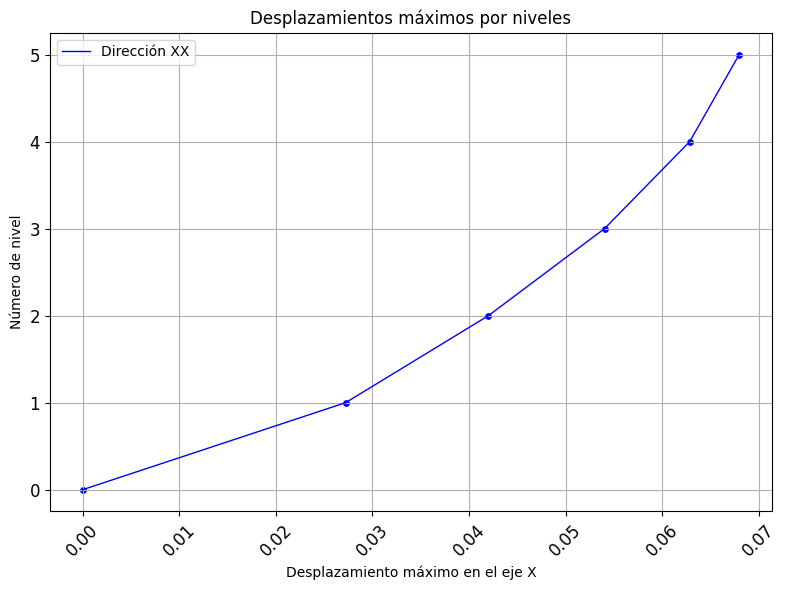

In [28]:
# Crear el gráfico de dispersión con línea de conexión
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.scatter(desplazx, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(desplazx, niveles, label='Dirección XX', color='b', linewidth=1)  # Línea de conexión
plt.xlabel('Desplazamiento máximo en el eje X')  # Etiqueta del eje X
plt.ylabel('Número de nivel')  # Etiqueta del eje Y
plt.title('Desplazamientos máximos por niveles')  # Título del gráfico
plt.legend()  # Mostrar leyenda

# Configuraciones adicionales para hacerlo más formal
plt.grid(True)  # Cuadrícula
plt.tick_params(axis='both', which='major', labelsize=12)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
#plt.savefig('grafico_doctorado.png', dpi=300)

# Mostrar el gráfico
plt.show()

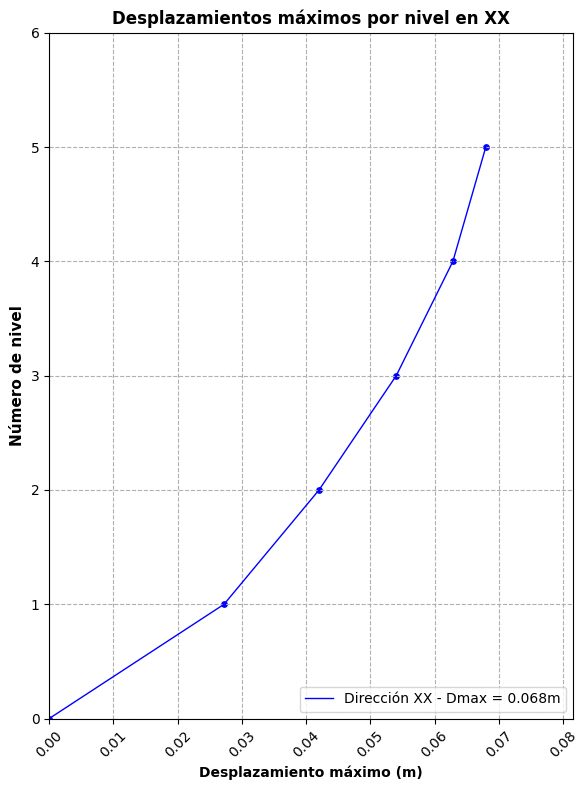

In [29]:
# Valor máximo de desplazx
max_desplazx = round(max(desplazx), 3)

# Crear el gráfico de dispersión con línea de conexión
plt.figure(figsize=(6, 8))  # Tamaño del gráfico
#plt.figure(figsize=(6, 8), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
plt.scatter(desplazx, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(desplazx, niveles, label=f'Dirección XX - Dmax = {max_desplazx}m', color='b', linewidth=1)  # Línea de conexión
plt.xlabel('Desplazamiento máximo (m)', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Número de nivel', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Desplazamientos máximos por nivel en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(desplazx)*1.2)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(0, max(niveles)+1)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('desplazamientos.png', dpi=300)

# Mostrar el gráfico
plt.show()

## Resultado de derivas máximas

In [30]:
name_table="Story Drifts"
table = SapModel.DatabaseTables.GetTableForDisplayArray(name_table ,GroupName="")    
cols=table[2]
noOfRows=table[3]
vals=np.array_split(table[4],noOfRows)
df= pd.DataFrame(vals)
df.columns=cols


# Filtrar los registros donde 'OutputCase' es igual a 'SX'
df = df[df['OutputCase'] == 'SX']


# Obtener solo la columna 8 (en Python, las columnas se indexan desde 0)
derivax = df.iloc[:, 7]  # Index 6 corresponde a la columna 7

# Convertir la columna en una lista numérica
derivax = derivax.tolist()

# Agregar el valor 0 al final de la lista
derivax.append('0')

# Convertir todos los elementos a números (incluso el '0' como cadena)
derivax = [float(item) for item in derivax]

# Ahora, desplazx contiene la columna 7 como una lista numérica con el valor 0 al final
print(derivax)

pisos=5

# Crear una lista descendente desde pisos hasta 0
niveles = [i for i in range(pisos, -1, -1)]
niveles


[0.001739, 0.002979, 0.004031, 0.004936, 0.006807, 0.0]


[5, 4, 3, 2, 1, 0]

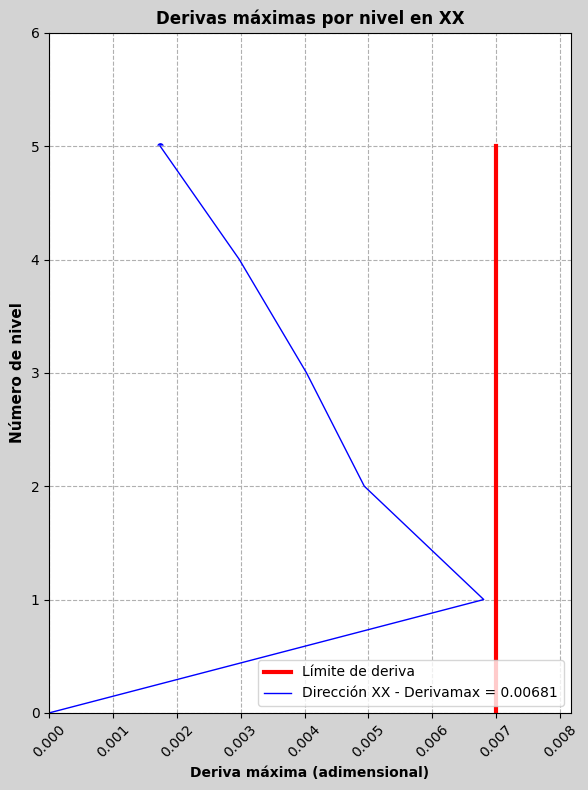

In [31]:
limite=[0.007] * (pisos+1)
# Valor máximo de desplazx
max_derivax = round(max(derivax), 5)

# Crear el gráfico de dispersión con línea de conexión
#plt.figure(figsize=(6, 8))  # Tamaño del gráfico
plt.figure(figsize=(6, 8), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
plt.scatter(derivax, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(limite, niveles, label='Límite de deriva', color='r', linewidth=3)  # Línea de conexión
plt.plot(derivax, niveles, label=f'Dirección XX - Derivamax = {max_derivax}', color='b', linewidth=1)  # Línea de conexión

# Área de color gris claro hasta el valor de 0.007
plt.fill_betweenx(niveles, 0, limite[0], color='white')
# Área de color rojo claro con transparencia al 20% a partir de 0.007
plt.fill_betweenx(niveles, 0.007, derivax, color='lightcoral', alpha=0.2)
# Área de color blanco hasta el valor de 0.007
plt.fill_betweenx(niveles, 0, 0.007, color='white')

plt.xlabel('Deriva máxima (adimensional)', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Número de nivel', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Derivas máximas por nivel en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(derivax)*1.2)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(0, max(niveles)+1)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('derivas.png', dpi=300)

# Mostrar el gráfico
plt.show()

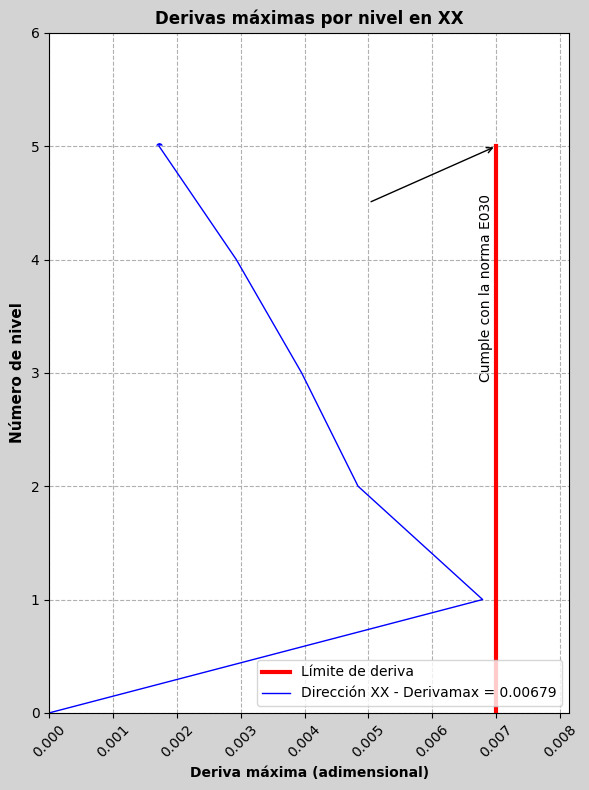

In [ ]:
# Valor máximo de desplazx
max_derivax = round(max(derivax), 5)

# Crear el gráfico de dispersión con línea de conexión
plt.figure(figsize=(6, 8), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
plt.scatter(derivax, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(limite, niveles, label='Límite de deriva', color='r', linewidth=3)  # Línea de conexión
plt.plot(derivax, niveles, label=f'Dirección XX - Derivamax = {max_derivax}', color='b', linewidth=1)  # Línea de conexión

# Área de color gris claro hasta el valor de 0.007
plt.fill_betweenx(niveles, 0, limite[0], color='white')

# Texto "Cumple con la norma E030" a la izquierda de 0.007
plt.text(0.007 - 0.00005, max(niveles) * 0.75, 'Cumple con la norma E030', fontsize=10, ha='right', va='center', rotation='vertical')
# Flecha antes de 0.007
plt.annotate('', xy=(0.007, max(niveles) * 1), xytext=(0.005, max(niveles) * 0.9),
             arrowprops=dict(arrowstyle='->', lw=1, color='black'))

# Área de color rojo claro con transparencia al 20% a partir de 0.007
plt.fill_betweenx(niveles, 0.007, derivax, color='lightcoral', alpha=0.2)
# Área de color blanco hasta el valor de 0.007
plt.fill_betweenx(niveles, 0, 0.007, color='white')

plt.xlabel('Deriva máxima (adimensional)', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Número de nivel', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Derivas máximas por nivel en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(derivax)*1.2)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(0, max(niveles)+1)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
# plt.savefig('grafico_doctorado.png', dpi=300)

# Mostrar el gráfico
plt.show()

## Cálculo de cortante por nivel

In [32]:
name_table="Story Forces"
table = SapModel.DatabaseTables.GetTableForDisplayArray(name_table ,GroupName="")    
cols=table[2]
noOfRows=table[3]
vals=np.array_split(table[4],noOfRows)
df= pd.DataFrame(vals)
df.columns=cols


# Filtrar los registros donde 'OutputCase' es igual a 'SX'
df = df[df['OutputCase'] == 'SX']
df

# Obtener solo la columna 9 (en Python, las columnas se indexan desde 0)
cortantex = df.iloc[:, 8]  # Index 6 corresponde a la columna 7

# Convertir la columna en una lista numérica
cortantex = cortantex.tolist()


# Convertir todos los elementos a números (incluso el '0' como cadena)
cortantex = [float(item) for item in cortantex]

# Ahora, desplazx contiene la columna 7 como una lista numérica con el valor 0 al final
print(cortantex)

pisos=5

lista_numerica = []  # Inicializamos la lista vacía
for i in range(pisos, -1, -1):
    lista_numerica.extend([i, i])  # Agregamos el valor actual de "pisos" dos veces a la lista
# Eliminar el primer y último valor de la lista
niveles = lista_numerica[1:-1]
niveles


[217.6136, 217.6828, 435.9146, 435.976, 619.0654, 619.1169, 762.4769, 762.517, 862.8642, 862.8903]


[5, 4, 4, 3, 3, 2, 2, 1, 1, 0]

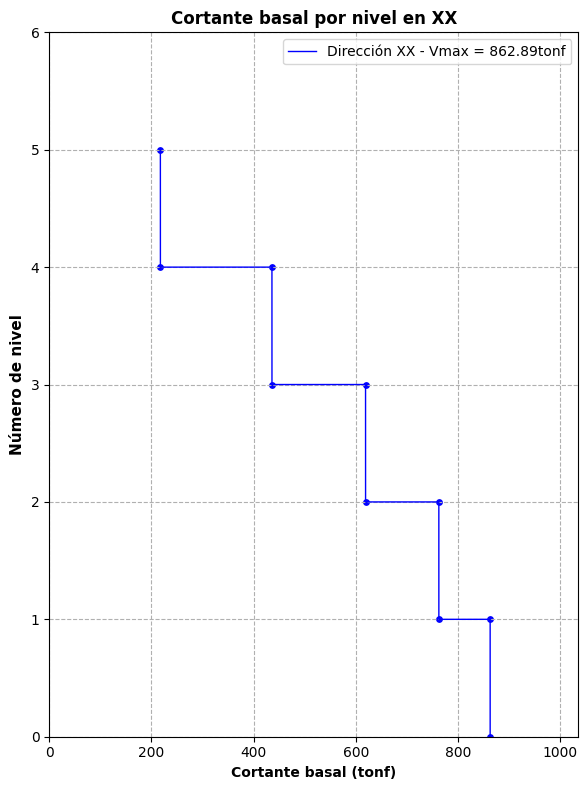

In [33]:
# Valor máximo de desplazx
max_desplazx = round(max(cortantex), 3)

# Crear el gráfico de dispersión con línea de conexión
plt.figure(figsize=(6, 8))  # Tamaño del gráfico
#plt.figure(figsize=(6, 8), facecolor='lightgray')  # Tamaño del gráfico y color de fondo gris
plt.scatter(cortantex, niveles, label='', marker='o', color='b', s=15)  # Puntos de dispersión
plt.plot(cortantex, niveles, label=f'Dirección XX - Vmax = {max_desplazx}tonf', color='b', linewidth=1)  # Línea de conexión
plt.xlabel('Cortante basal (tonf)', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Número de nivel', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Cortante basal por nivel en XX', fontsize=12, fontweight='bold')  # Título del gráfico

# Leyenda en la parte inferior derecha
plt.legend(loc='upper right')

# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=0)  # Rotar etiquetas del eje X si es necesario
plt.xlim(0, max(cortantex)*1.2)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
plt.ylim(0, max(niveles)+1)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('cortantes.png', dpi=300)

# Mostrar el gráfico
plt.show()

In [35]:
NumberResults = 0
Obj = []
ObjSta = []
Elm = []
ElmSta = []
LoadCase = []
StepType = []
StepNum = []
P = []
V2 = []
V3 = []
T = []
M2 = []
M3 = []

# CREACIÓN DEL COMBO ( 1=envolvente, 0 = adicionar)
ret = SapModel.RespCombo.Add("RX", 1)
# Agregar cargas (0=LoadCase, 1=LoadCombo)
ret = SapModel.RespCombo.SetCaseList("RX", 0, "SX", 1)

#deselect all cases and combos
ret = SapModel.Results.Setup.DeselectAllCasesAndCombosForOutput()

#set case selected for output
ret = SapModel.Results.Setup.SetComboSelectedForOutput("RX")

#get frame forces
[NumberResults, Obj, ObjSta, Elm, ElmSta, LoadCase, StepType, StepNum, P, V2, V3, T, M2, M3,ret] = SapModel.Results.FrameForce("63", 0, NumberResults, Obj, ObjSta, Elm, ElmSta, LoadCase, StepType, StepNum, P, V2, V3, T, M2, M3)

ret
NumberResults
Obj
ObjSta
Elm
M3
ObjSta

Mmax = M3[:int(NumberResults/2)] # El int es para transformarlo a número entero "integer"
Mmin = M3[int(NumberResults/2):] # El int es para transformarlo a número entero "integer"
station=ObjSta[int(NumberResults/2):]
zeros=[0]*int(NumberResults/2)
station
Mmax
Obj
zeros
station[-1]

3.2714000000000003

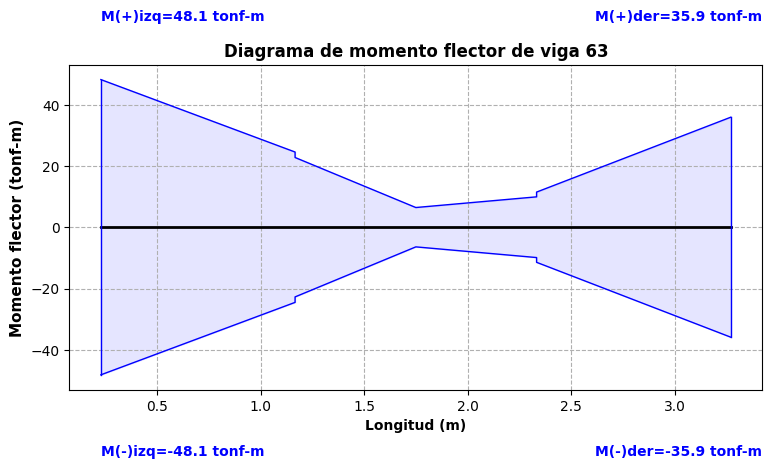

In [36]:
# Crear el gráfico de dispersión con línea de conexión
plt.figure(figsize=(8, 5))  # Tamaño del gráfico

#Gráfico de los dibujos
plt.plot(station, Mmax, '', color='b', linewidth=1)  # Línea de conexión
plt.plot(station, Mmin, '', color='b', linewidth=1)  # Línea de conexión
plt.plot(station, zeros, '', color='k', linewidth=2)  # Línea de conexión
plt.plot([station[0],station[0]], [Mmin[0],Mmax[0]], '', color='b', linewidth=1)  # Línea de conexión
plt.plot([station[-1],station[-1]], [Mmin[-1],Mmax[-1]], '', color='b', linewidth=1)  # Línea de conexión

# Rellenar el área entre Mmax y Mmin con color azul
plt.fill_between(station, Mmax, Mmin, color='blue', alpha=0.1)  # Cambia alpha para controlar la transparencia

plt.xlabel('Longitud (m)', fontsize=10, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Momento flector (tonf-m)', fontsize=11, fontweight='bold')  # Etiqueta del eje Y
plt.title('Diagrama de momento flector de viga' + " " + Obj[1] , fontsize=12, fontweight='bold')  # Título del gráfico

# Agregar texto en una posición específica
plt.text(station[0], max(Mmax)*1.4, 'M(+)izq=' + str(round(Mmax[0],1)) + ' tonf-m', fontsize=10, color='blue', fontweight='bold')
plt.text(station[-1]*0.8, max(Mmax)*1.4, 'M(+)der=' + str(round(Mmax[-1],1)) + ' tonf-m', fontsize=10, color='blue', fontweight='bold')
plt.text(station[0], min(Mmin)*1.55, 'M(-)izq=' + str(round(Mmin[0],1)) + ' tonf-m', fontsize=10, color='blue', fontweight='bold')
plt.text(station[-1]*0.8, min(Mmin)*1.55, 'M(-)der=' + str(round(Mmin[-1],1)) + ' tonf-m', fontsize=10, color='blue', fontweight='bold')


# Configuraciones adicionales para hacerlo más formal
plt.grid(True, linestyle='--')  # Cuadrícula con líneas punteadas
plt.tick_params(axis='both', which='major', labelsize=10)  # Tamaño de las etiquetas de los ejes
plt.xticks(rotation=0)  # Rotar etiquetas del eje X si es necesario
#plt.xlim(0, max(cortantex)*1.2)  # Establecer límites del eje X desde 0 hasta el valor máximo de desplazx
#plt.ylim(0, max(niveles)+1)  # Establecer límites del eje Y desde 0 hasta el valor máximo de niveles
plt.tight_layout()  # Ajustar el diseño

# Guardar el gráfico en un archivo (opcional)
plt.savefig('viga.png', dpi=300)

# Mostrar el gráfico
plt.show()